In [1]:
from tensorflow.keras.models import load_model
import pandas as pd
import os
import numpy as np

In [2]:
model=load_model("my_model.h5")

In [3]:
path="dataset/"
df=pd.DataFrame(columns=["path","label"])
files=os.listdir(path)
for Class in files:
    for name in os.listdir(path+Class):
       new_row = pd.DataFrame([[os.path.join(path, Class, name), Class]], columns=["path", "label"])
       df = pd.concat([df, new_row], ignore_index=True)

In [4]:
np.random.seed(42)
df.sample(frac=1).reset_index(drop=True)
df['label'] = df['label'].map({'with_mask': 1, 'without_mask': 0}).astype(int)

In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def load_and_prepare_images(paths, target_size=(180, 180)):
    images = []
    for path in paths:
        img = load_img(path, target_size=target_size)
        img_array = img_to_array(img) / 255.0
        images.append(img_array)
    return np.array(images)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df["path"],df["label"],test_size=0.2,random_state=42)

In [7]:
X_test=load_and_prepare_images(X_test)

In [8]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5).astype(int)

3/3 [==============================] - 3s 569ms/step


In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
model_cm=confusion_matrix(y_test,y_pred)

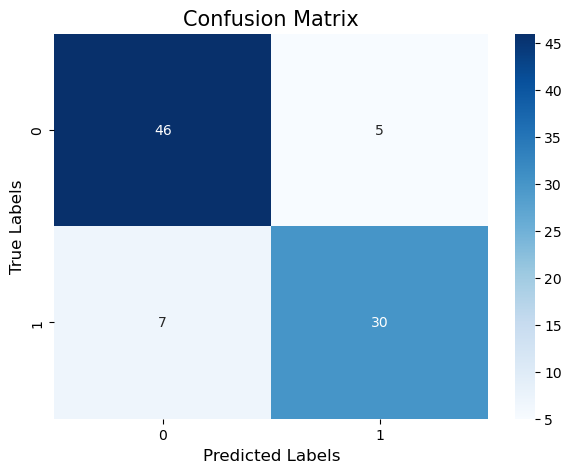

In [11]:
plt.figure(figsize=(7,5))
sns.heatmap(model_cm, annot=True, fmt='d', cmap='Blues',annot_kws={"size":10})

# Eksende yazıları biraz daha belirgin hale getirmek için:
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Eksen yazılarını ve grafik başlığını daha belirgin hale getirmek için:
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("ConfusionMatrix.jpg")
plt.show()

1/1 [==============================] - 1s 538ms/step
Maske Takmıyor ve Doğru


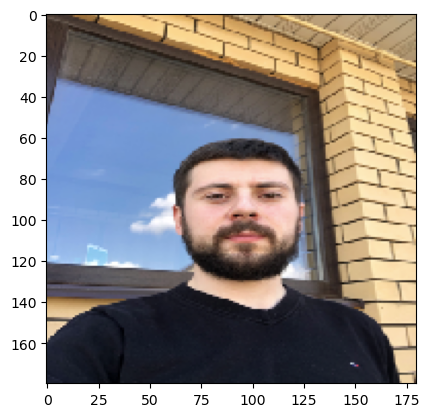

In [12]:
b=21
y_test=np.array(y_test)
prediction = model.predict(np.array([X_test[b]]))

prediction = (prediction > 0.5).astype(int).flatten()
prediction[0]

if prediction[0] == y_test[b] and prediction[0] == 1:
    print("Maske Takıyor ve Doğru")
elif prediction[0] != y_test[b] and prediction[0] == 1:
    print("Maske Takmıyor ve Yanlış")
elif prediction[0] == y_test[b] and prediction[0] == 0:
    print("Maske Takmıyor ve Doğru")
elif prediction[0]!= y_test[b] and prediction[0] == 0:
    print("Maske Takıyor ve Yanlış")

plt.imshow(X_test[b]);